In [16]:
from matplotlib import pyplot as plt
import numpy as np
import scipy
import scipy.signal as sig
%matplotlib inline

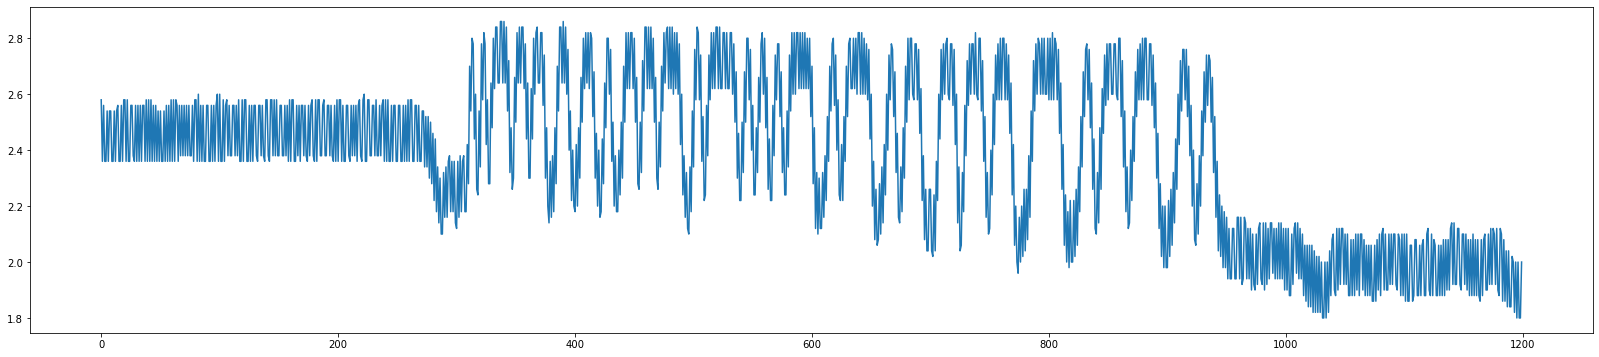

In [35]:
data = np.genfromtxt('barcode_test.csv', delimiter=',', skip_header=2, usecols=1)[::-1]
fig, ax = plt.subplots(figsize=(28, 6))
ax.plot(data)

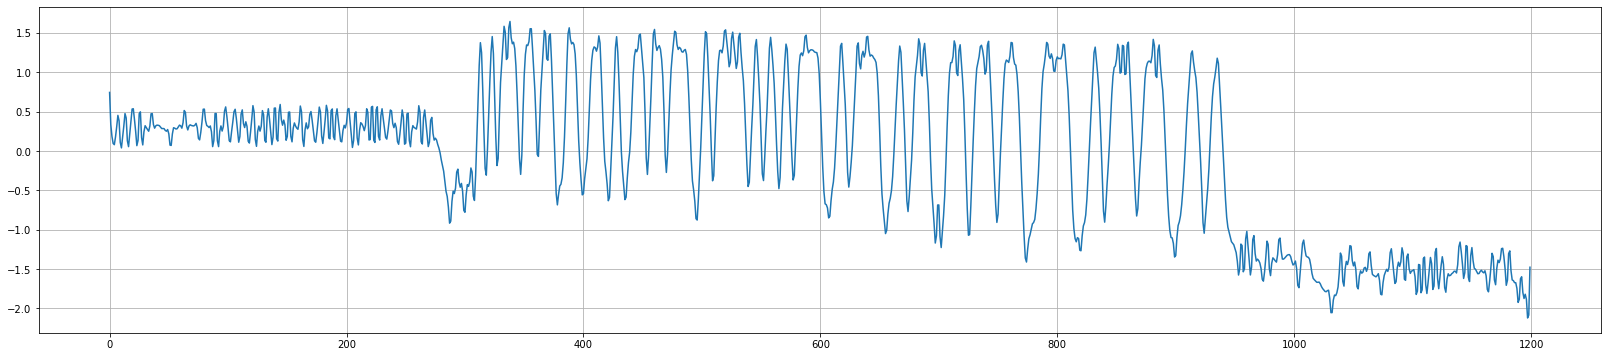

In [44]:
sos = sig.butter(2, 0.5, btype='lowpass', output='sos')
filtered = sig.sosfiltfilt(sos, data)
filtered -= np.mean(filtered)
filtered /= np.sqrt(np.mean(filtered**2))

fig, ax = plt.subplots(figsize=(28, 6))
ax.plot(filtered)
ax.grid()

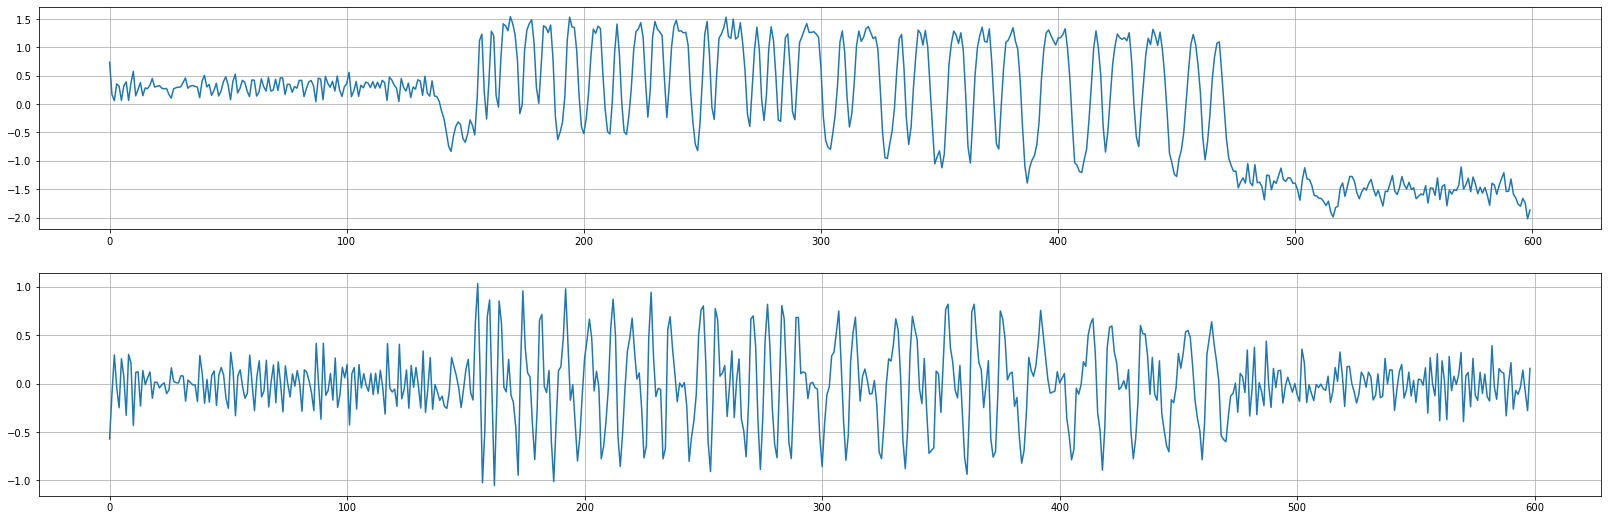

In [52]:
decimated = sig.decimate(filtered, 2)

dy = decimated[1:] - decimated[:-1]

fig, (ax1, ax2) = plt.subplots(2, figsize=(28, 9))
ax1.plot(decimated)
ax2.plot(dy)
ax1.grid()
ax2.grid()

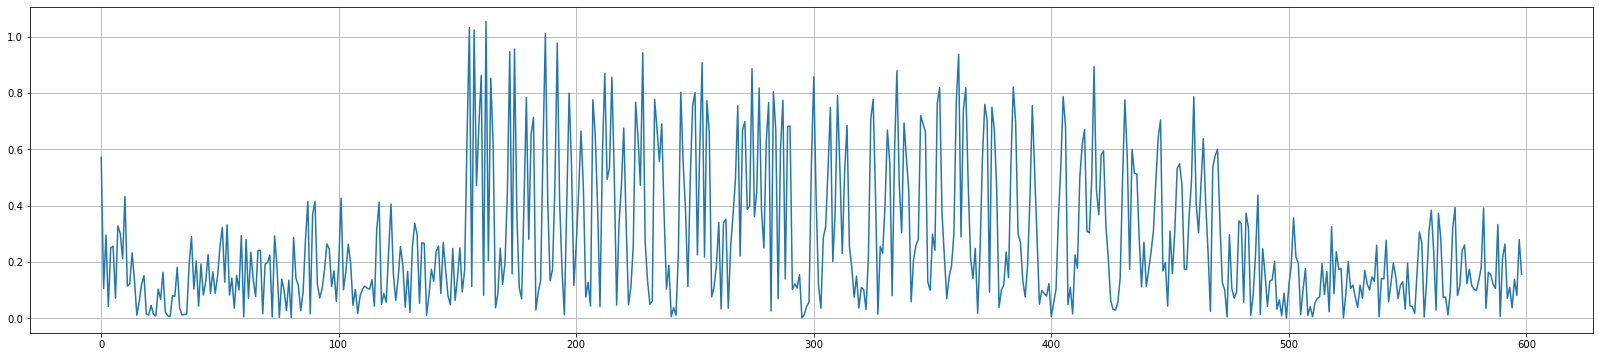

In [67]:
#arr = np.zeros([5, len(dy)])
#for i in range(arr.shape[0]):
#    print(i, arr[i, i:].shape, np.abs(dy).shape)
#    arr[i, i:] = np.abs(dy)[:len(dy)-i]
#arr = arr.max(axis=0)

fig, ax = plt.subplots(figsize=(28, 6))
ax.plot(np.abs(dy))
ax.grid()